# Dynamic Topic Model

In [86]:
import genLDA
from gensim.models import LdaModel, CoherenceModel
from gensim import models

%matplotlib inline
import matplotlib.pyplot as plt


https://radimrehurek.com/gensim/models/ldaseqmodel.html

In [11]:
topic_num=10

dtm=models.LdaSeqModel.load("cvpr_papers_10.model")

code from https://qiita.com/zeze/items/5a89897bab457683b87b

# 頻出単語リスト

In [89]:
for topic_id, probs in enumerate(dtm.gammas.transpose()):
    print("topic_id", topic_id, ":", dtm.print_topic(topic_id, time=0))
    
    for doc_id in probs.argsort()[::-1][:5]:
        print("\t", probs[doc_id])
    

topic_id 0 : [('adversarial', 0.02515054709932138), ('generative', 0.019094677535081945), ('generator', 0.017647472716795017), ('style', 0.016604488777838617), ('generated', 0.013668744827204385), ('latent', 0.011900993373581642), ('transfer', 0.011893246910452536), ('real', 0.011721182317743092), ('generate', 0.010533558857337557), ('output', 0.00927191315051764), ('gan', 0.008186451081083474), ('convolutional', 0.008080942776563443), ('discriminator', 0.007767200983980313), ('content', 0.007550936697140701), ('networks', 0.007122069122118), ('conference', 0.007058165654998034), ('synthesis', 0.006687161117544521), ('agent', 0.006488136212196785), ('distribution', 0.006191815445700947), ('generation', 0.006183183026348847)]
	 2382.2833768397713
	 2064.1684532666604
	 1601.9464143267073
	 1555.9041698181923
	 1498.2014678890725
topic_id 1 : [('face', 0.042454115805395536), ('facial', 0.020781458162045068), ('recognition', 0.01739556615832948), ('person', 0.016681279394342198), ('featur

Topic ID 0


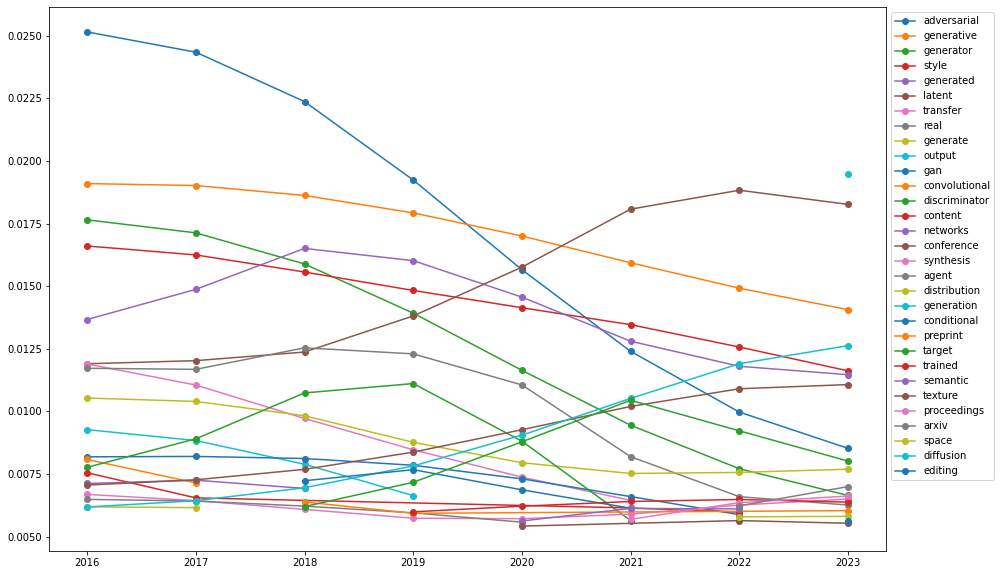

Topic ID 1


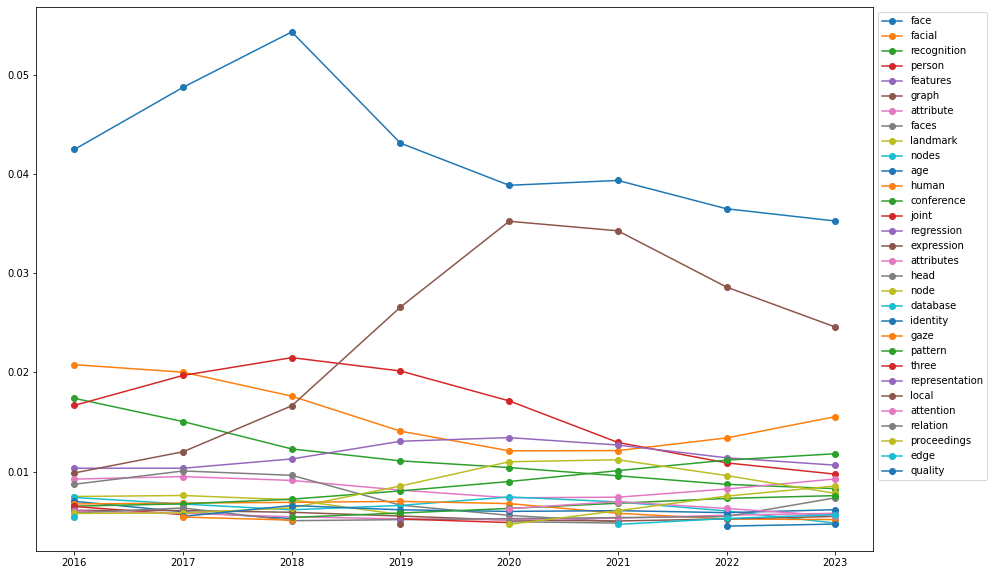

Topic ID 2


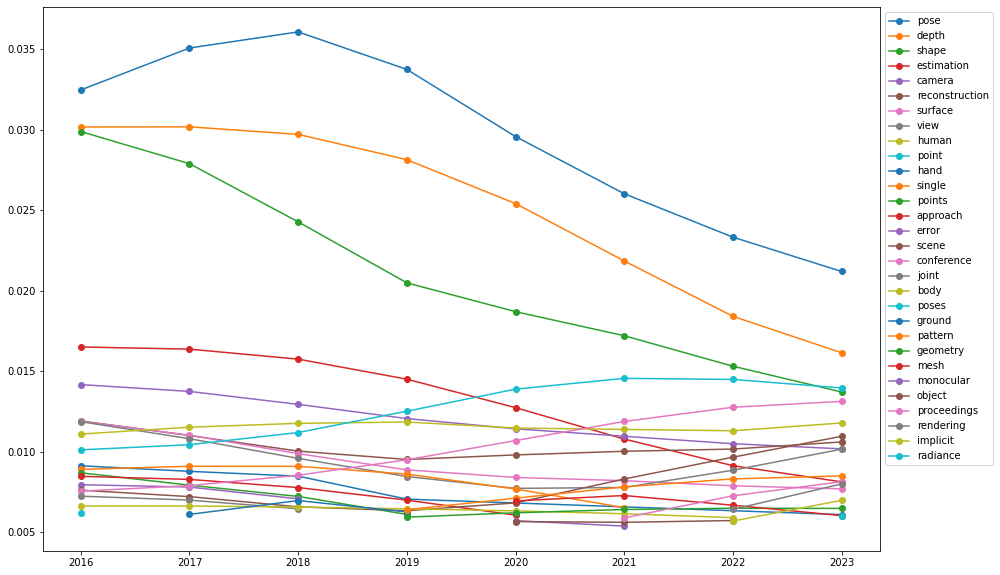

Topic ID 3


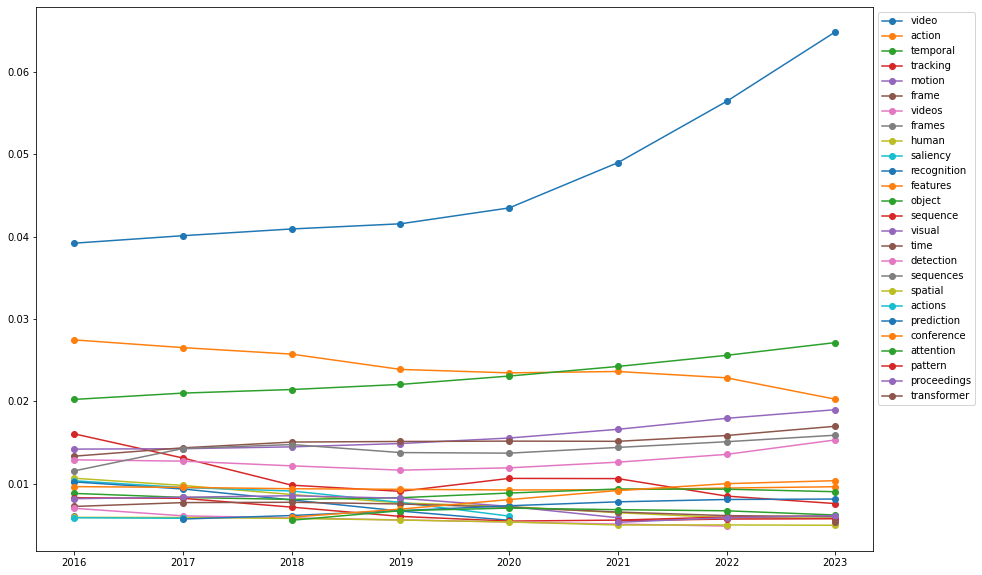

Topic ID 4


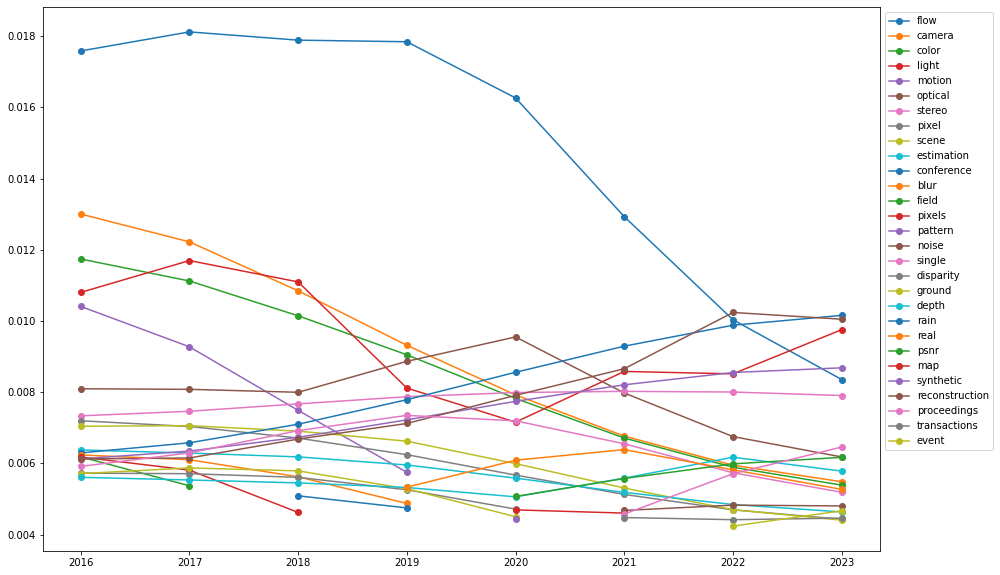

Topic ID 5


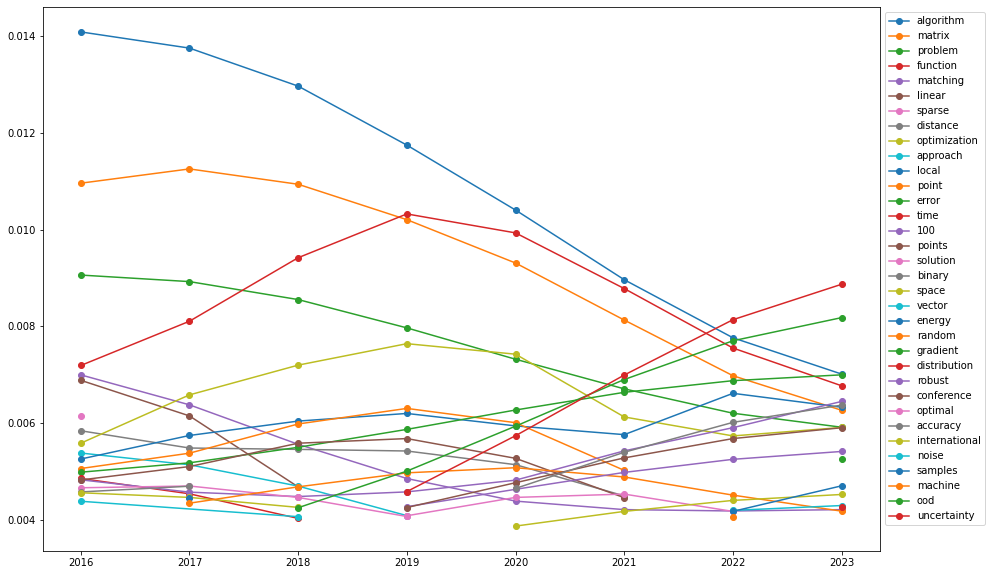

Topic ID 6


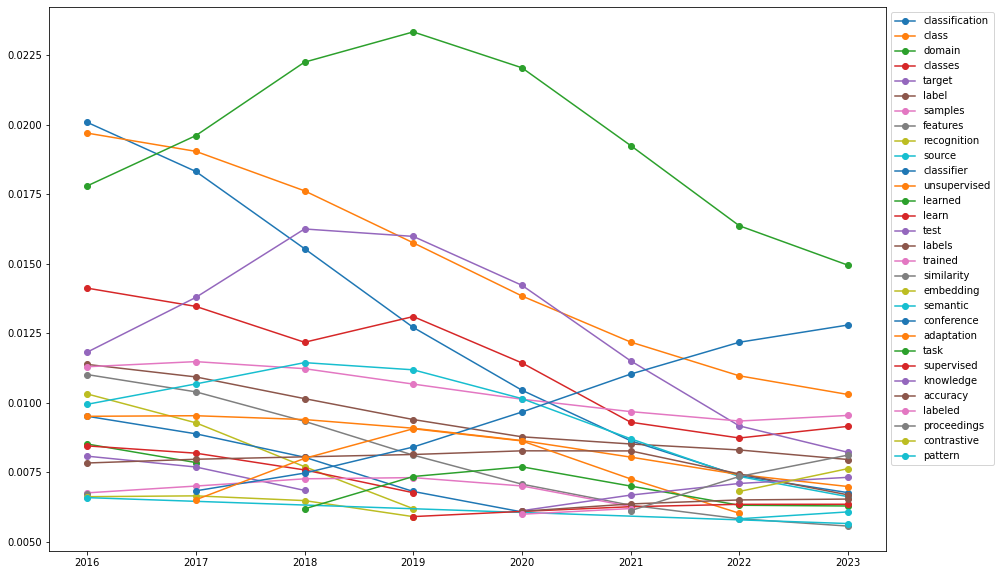

Topic ID 7


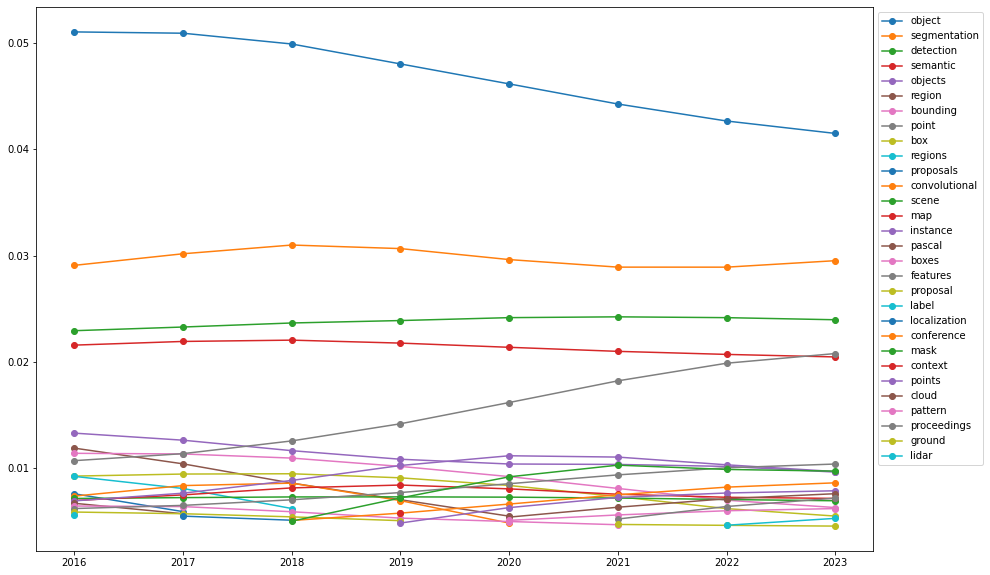

Topic ID 8


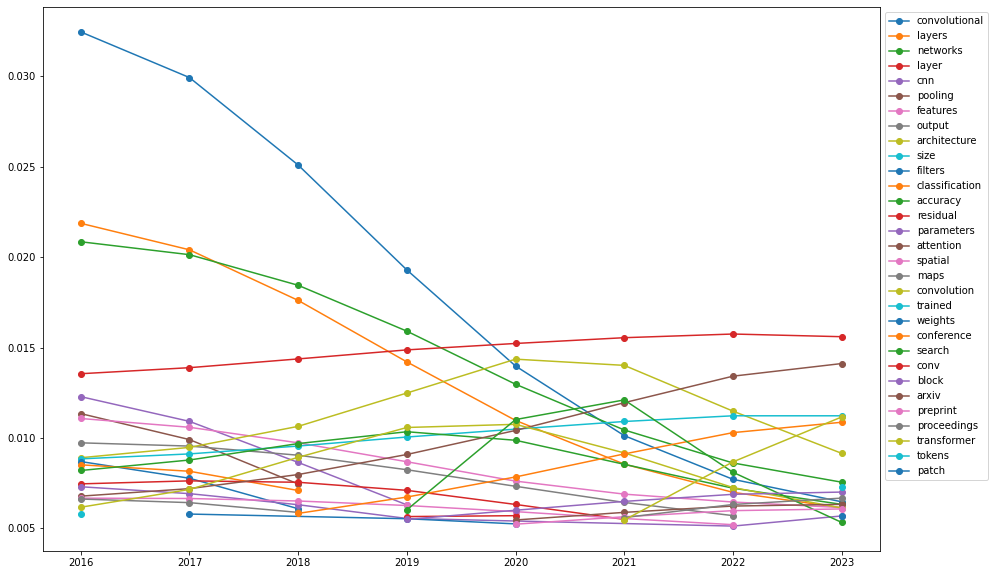

Topic ID 9


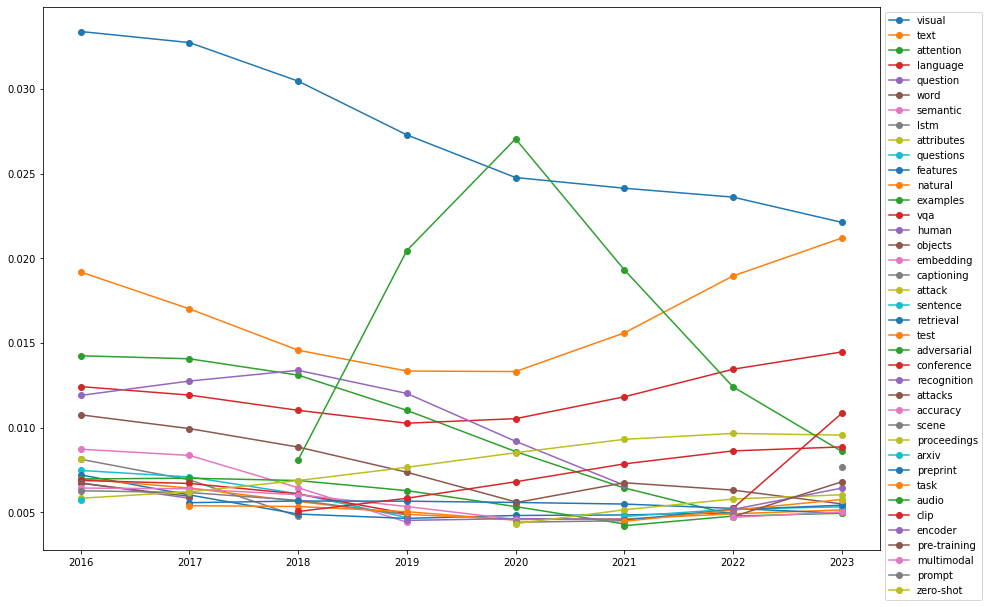

In [111]:
years=[y for y in range(2016,2023+1)]

for topic_id in range(0, topic_num):
    vl={}
    y={}
    for time,year in enumerate(years):
        v=dtm.print_topic(topic_id, time)    
        values=[l[1]for l in v]
        labels=[l[0] for l in v]
        for index,l in enumerate(labels):
                #v=[year,values[index]]
                v=values[index]
                if(not l in vl.keys()):
                    vl[l]=[v]
                    y[l]=[year]
                else:
                    vl[l].append(v)
                    y[l].append(year)
                    
    print("Topic ID %d"%(topic_id))
    
    plt.figure(figsize=(15,10))
    for l in vl.keys():
        plt.plot(y[l],vl[l],label=l,marker="o")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()        

year 2016, topic_id 0


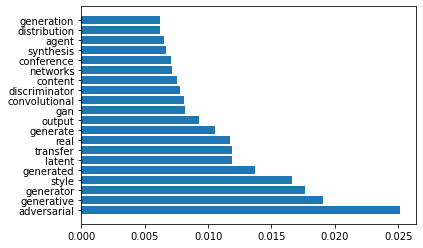

year 2016, topic_id 1


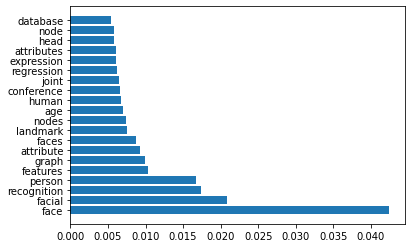

year 2016, topic_id 2


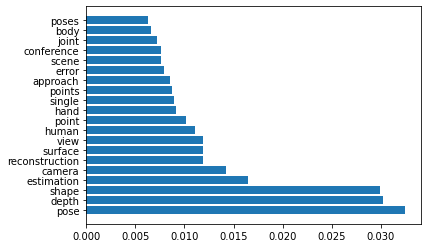

year 2016, topic_id 3


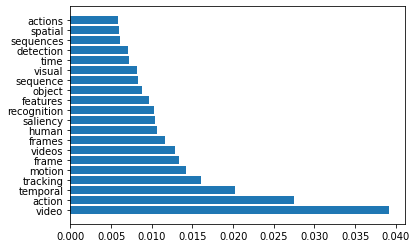

year 2016, topic_id 4


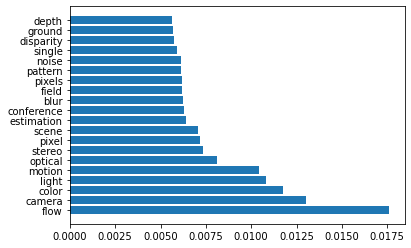

year 2016, topic_id 5


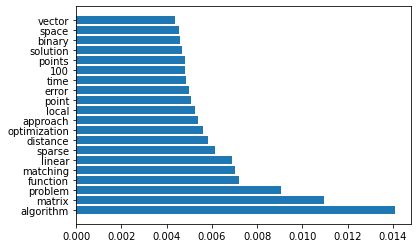

year 2016, topic_id 6


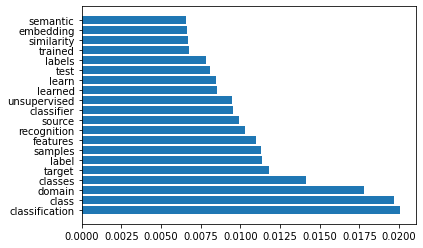

year 2016, topic_id 7


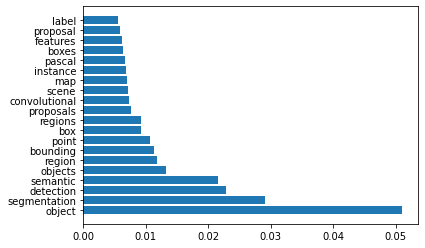

year 2016, topic_id 8


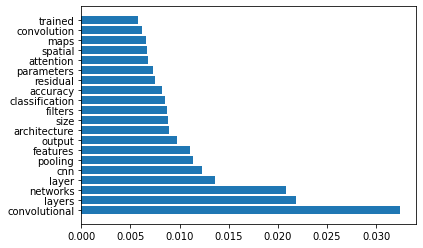

year 2016, topic_id 9


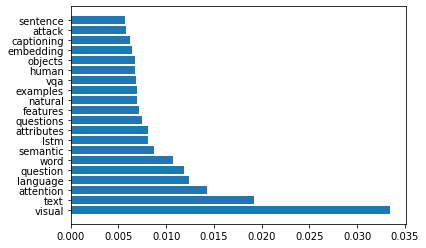

year 2017, topic_id 0


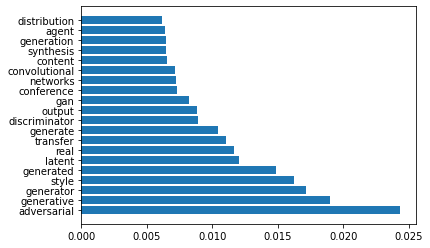

year 2017, topic_id 1


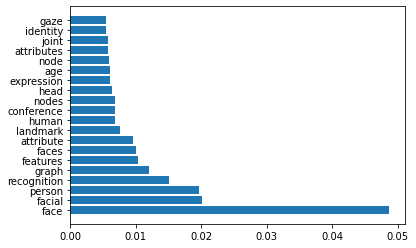

year 2017, topic_id 2


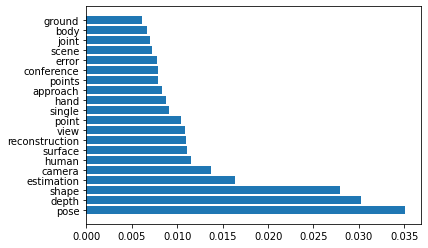

year 2017, topic_id 3


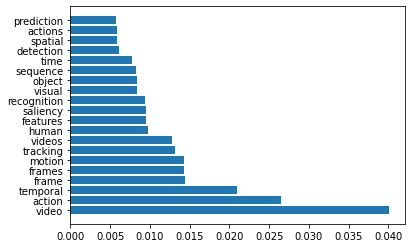

year 2017, topic_id 4


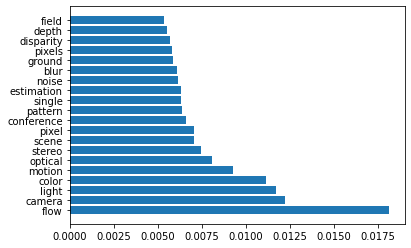

year 2017, topic_id 5


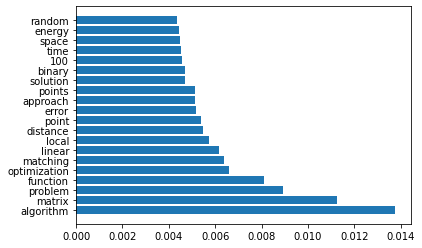

year 2017, topic_id 6


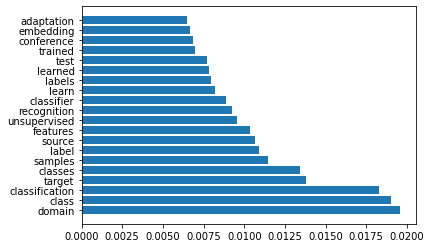

year 2017, topic_id 7


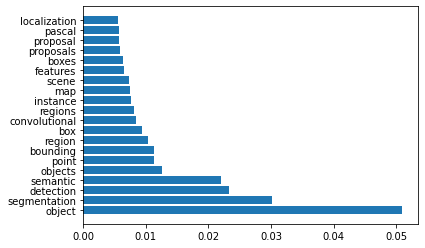

year 2017, topic_id 8


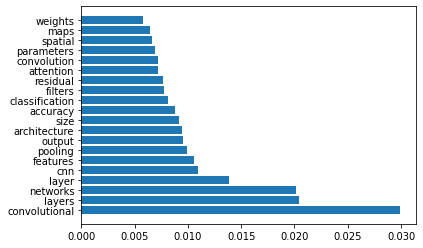

year 2017, topic_id 9


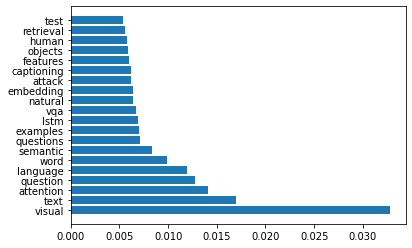

year 2018, topic_id 0


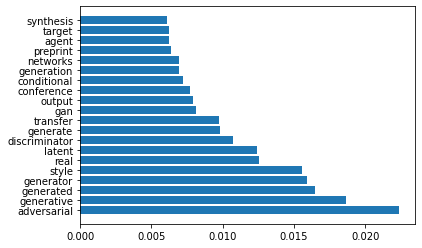

year 2018, topic_id 1


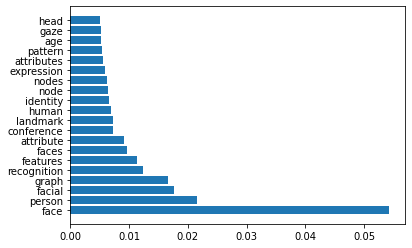

year 2018, topic_id 2


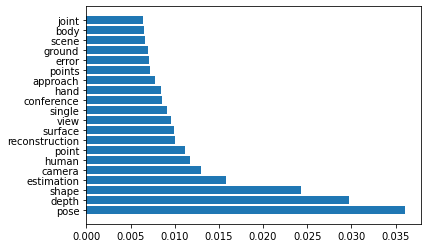

year 2018, topic_id 3


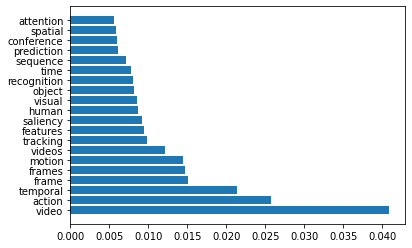

year 2018, topic_id 4


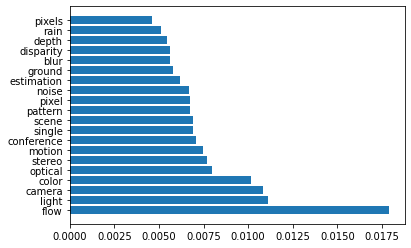

year 2018, topic_id 5


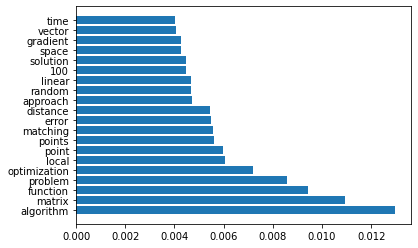

year 2018, topic_id 6


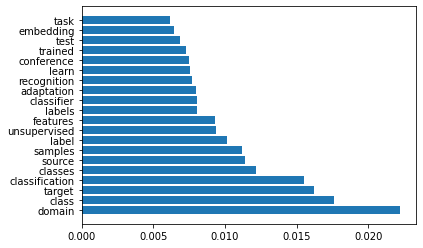

year 2018, topic_id 7


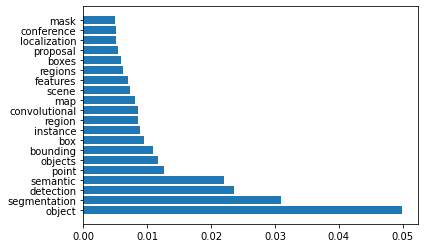

year 2018, topic_id 8


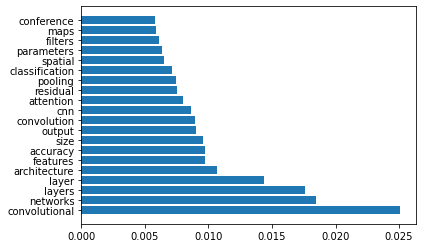

year 2018, topic_id 9


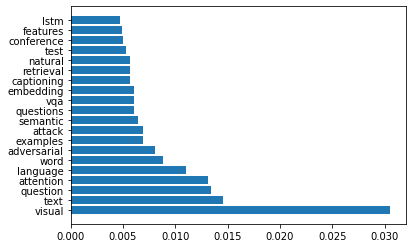

year 2019, topic_id 0


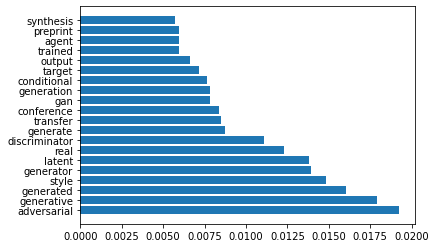

year 2019, topic_id 1


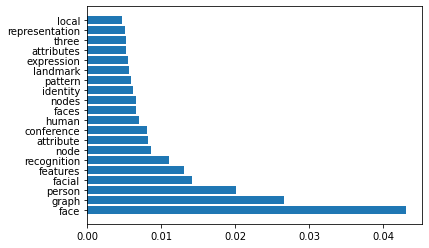

year 2019, topic_id 2


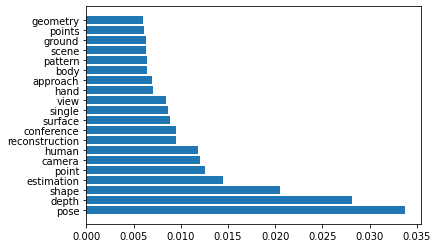

year 2019, topic_id 3


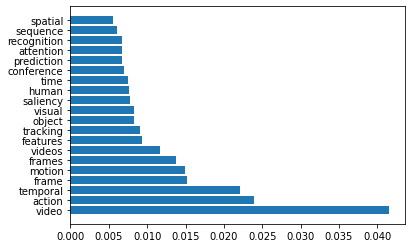

year 2019, topic_id 4


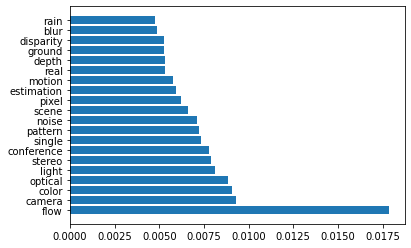

year 2019, topic_id 5


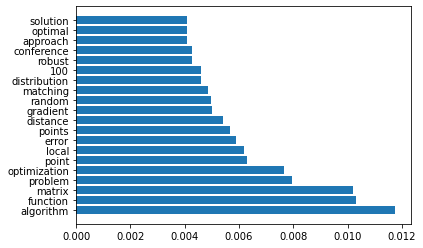

year 2019, topic_id 6


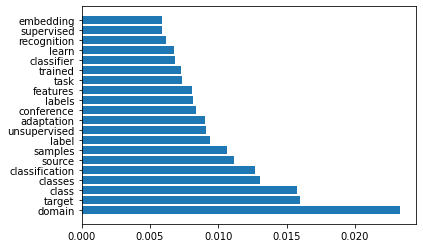

year 2019, topic_id 7


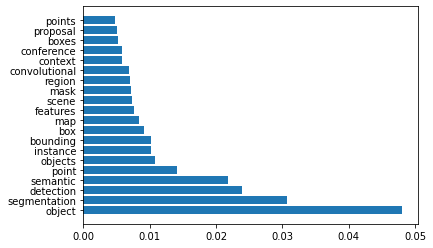

year 2019, topic_id 8


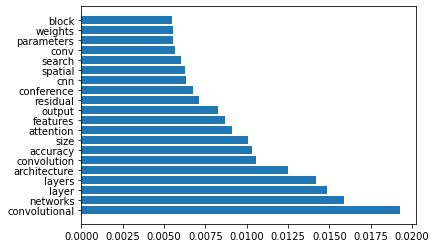

year 2019, topic_id 9


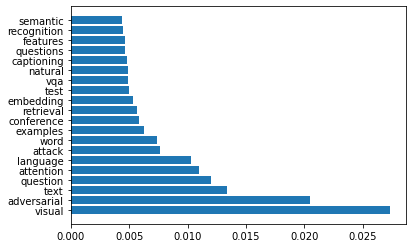

year 2020, topic_id 0


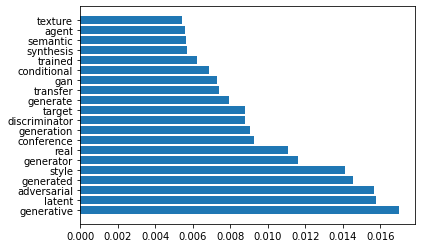

year 2020, topic_id 1


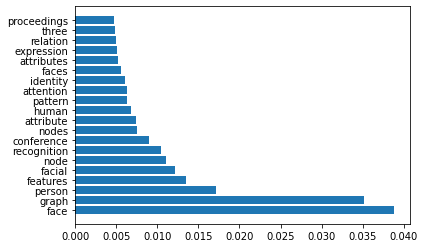

year 2020, topic_id 2


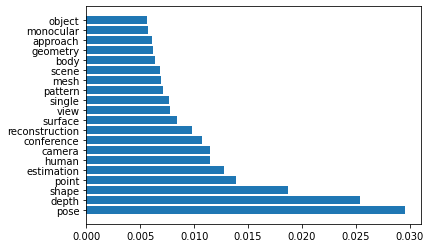

year 2020, topic_id 3


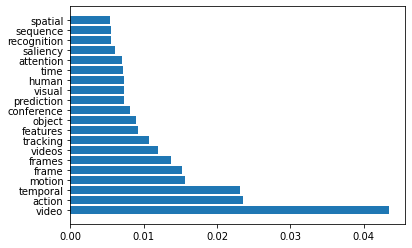

year 2020, topic_id 4


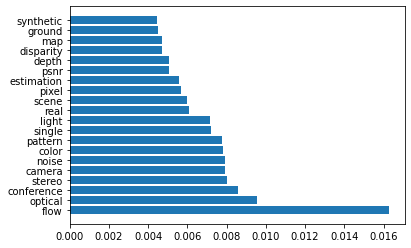

year 2020, topic_id 5


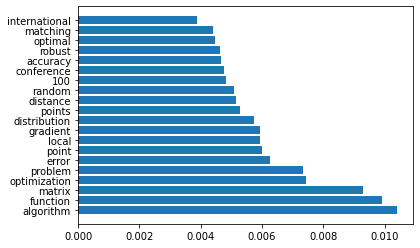

year 2020, topic_id 6


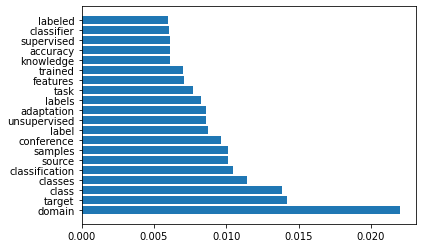

year 2020, topic_id 7


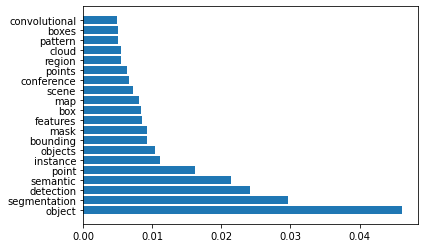

year 2020, topic_id 8


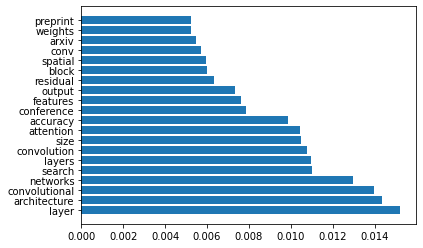

year 2020, topic_id 9


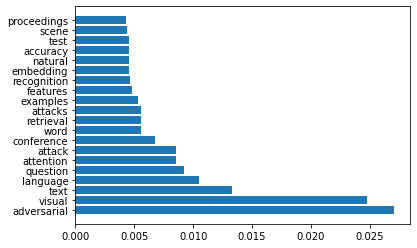

year 2021, topic_id 0


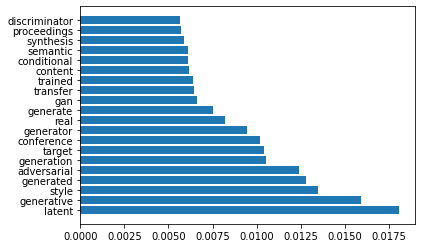

year 2021, topic_id 1


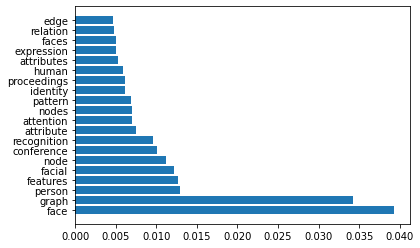

year 2021, topic_id 2


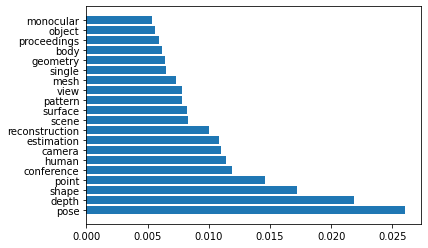

year 2021, topic_id 3


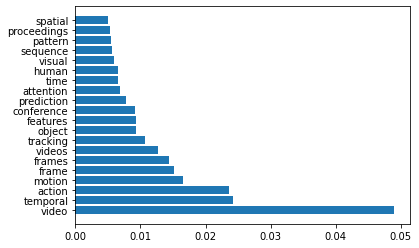

year 2021, topic_id 4


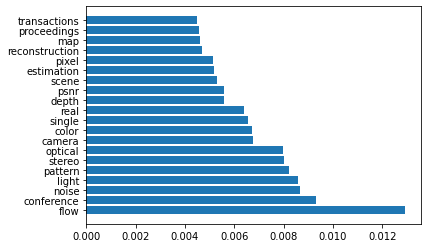

year 2021, topic_id 5


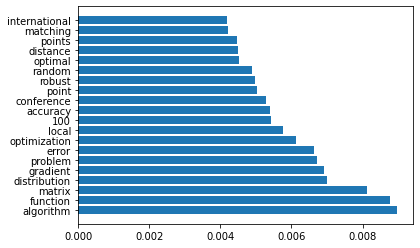

year 2021, topic_id 6


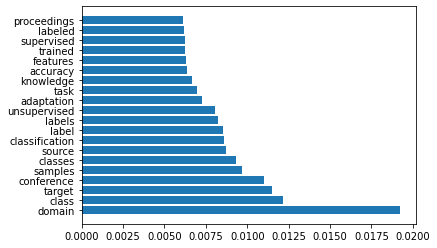

year 2021, topic_id 7


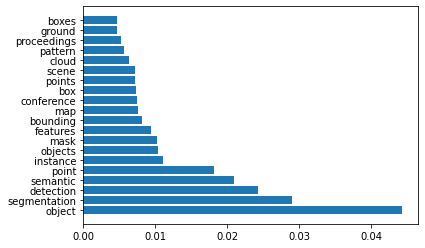

year 2021, topic_id 8


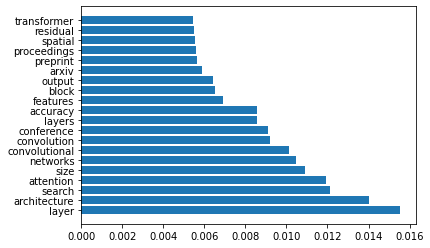

year 2021, topic_id 9


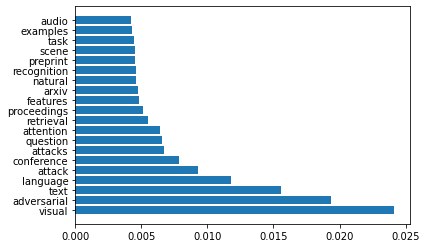

year 2022, topic_id 0


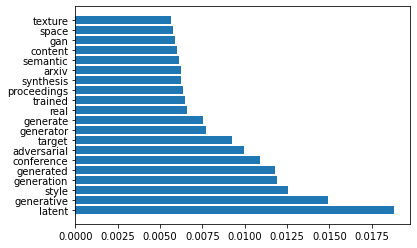

year 2022, topic_id 1


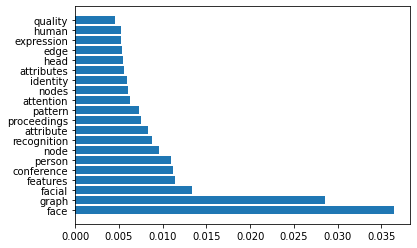

year 2022, topic_id 2


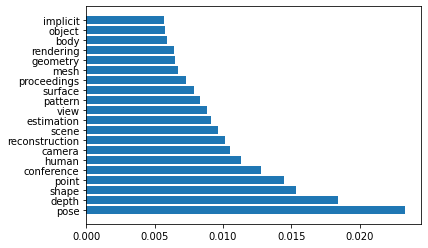

year 2022, topic_id 3


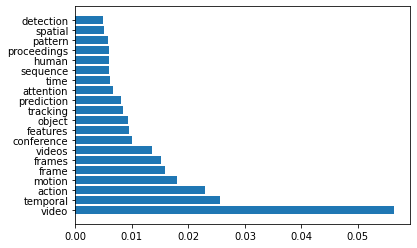

year 2022, topic_id 4


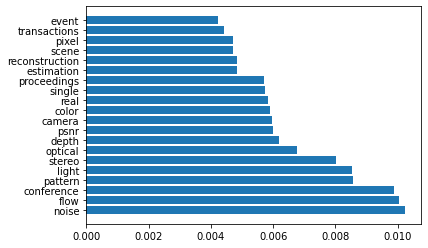

year 2022, topic_id 5


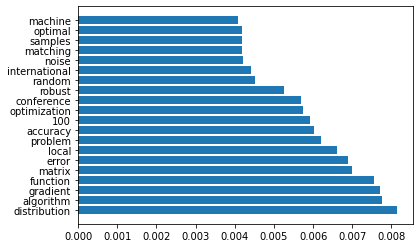

year 2022, topic_id 6


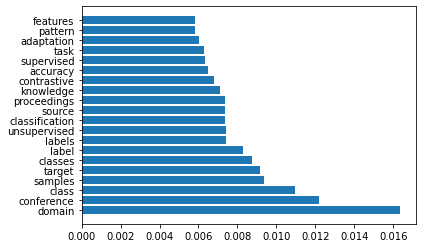

year 2022, topic_id 7


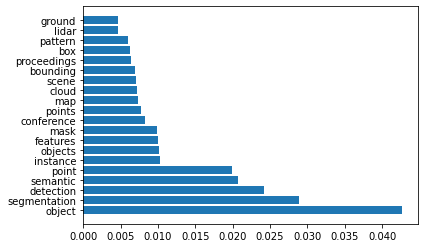

year 2022, topic_id 8


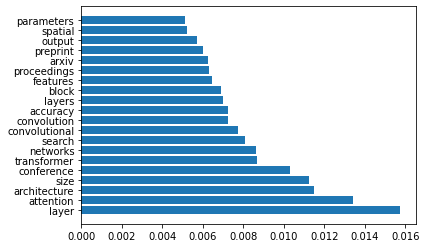

year 2022, topic_id 9


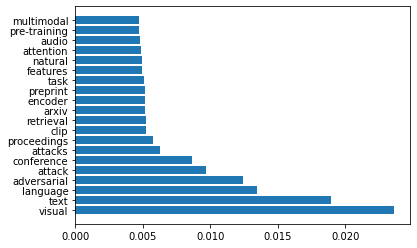

year 2023, topic_id 0


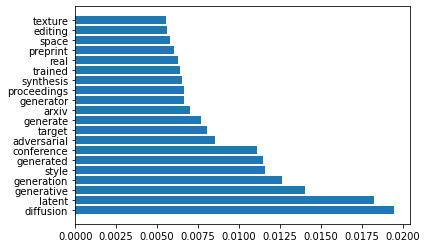

year 2023, topic_id 1


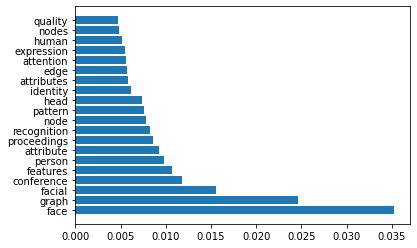

year 2023, topic_id 2


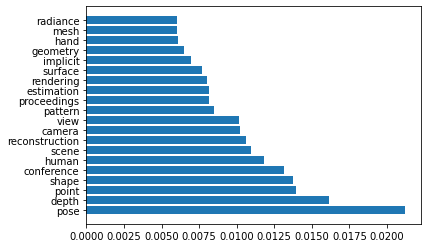

year 2023, topic_id 3


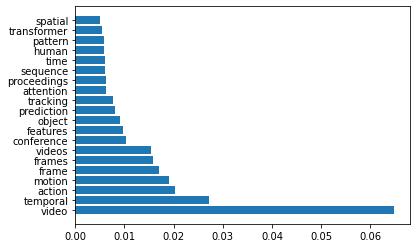

year 2023, topic_id 4


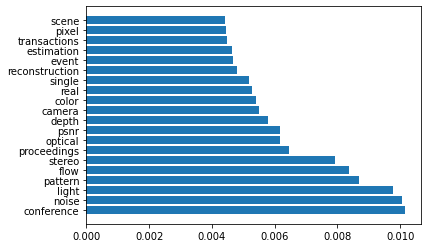

year 2023, topic_id 5


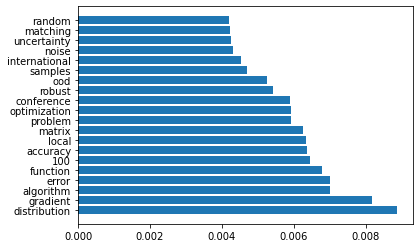

year 2023, topic_id 6


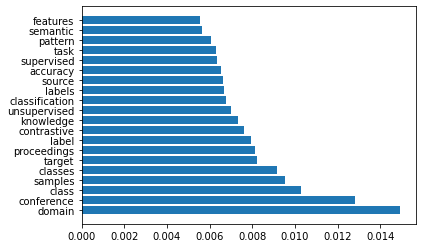

year 2023, topic_id 7


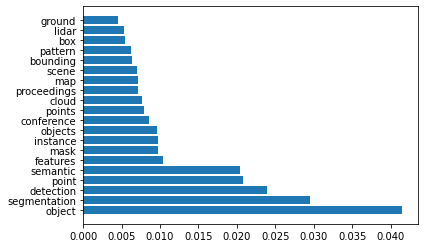

year 2023, topic_id 8


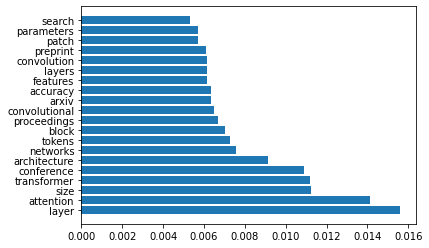

year 2023, topic_id 9


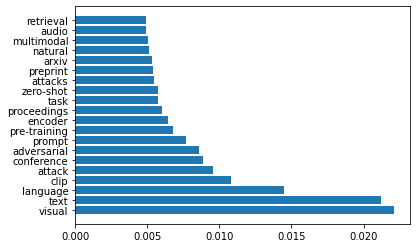

In [31]:
for time,year in enumerate(years):
    for topic_id in range(0, topic_num):
        print("year %d, topic_id %d"%(year,topic_id))
        v=dtm.print_topic(topic_id, time)
        values=[l[1]for l in v]
        labels=[l[0] for l in v]
        index=range(len(labels))
        plt.barh(index ,values,tick_label=labels, align="center")
        plt.show()

In [74]:
for time,year in enumerate(years):
    for topic_id in range(topic_num):
        v=dtm.print_topic(topic_id, time)
        labels=[l[0][:10] for l in v][:10]
        
        print("%d, topic_id %d %s"%(year,topic_id,labels))


2016, topic_id 0 ['adversaria', 'generative', 'generator', 'style', 'generated', 'latent', 'transfer', 'real', 'generate', 'output']
2016, topic_id 1 ['face', 'facial', 'recognitio', 'person', 'features', 'graph', 'attribute', 'faces', 'landmark', 'nodes']
2016, topic_id 2 ['pose', 'depth', 'shape', 'estimation', 'camera', 'reconstruc', 'surface', 'view', 'human', 'point']
2016, topic_id 3 ['video', 'action', 'temporal', 'tracking', 'motion', 'frame', 'videos', 'frames', 'human', 'saliency']
2016, topic_id 4 ['flow', 'camera', 'color', 'light', 'motion', 'optical', 'stereo', 'pixel', 'scene', 'estimation']
2016, topic_id 5 ['algorithm', 'matrix', 'problem', 'function', 'matching', 'linear', 'sparse', 'distance', 'optimizati', 'approach']
2016, topic_id 6 ['classifica', 'class', 'domain', 'classes', 'target', 'label', 'samples', 'features', 'recognitio', 'source']
2016, topic_id 7 ['object', 'segmentati', 'detection', 'semantic', 'objects', 'region', 'bounding', 'point', 'box', 'regions

# 代表的論文

In [ ]:
import collections 

#items=a

times = [item['created_at'].strftime("%Y%m") for item in items]
#times = [item['created_at'].strftime("%Y%m") for item in items]

counter = collections.Counter( times )

# 個数を元にtime_slicesを構成
time_slices = [counter[key] for key in sorted(counter.keys())]

# 以下、可視化時に利用
# YYYYMM -> index
time_slice_dict = { key:index for index, key in enumerate(sorted(counter.keys()))}
# index -> YYYYMM
time_slice_keys = [ key for key in sorted(counter.keys())]
# アイテムごとのindex
time_slice_of_items = [ time_slice_dict[time] for time in times]

In [20]:
import numpy as np

for topic_id, probs in enumerate(dtm.gammas.transpose()):
    print("==============")
    print("topic_id", topic_id, ":", dtm.print_topic(topic_id, time=0))
    
    for doc_id in probs.argsort()[::-1][:5]:
        print("\t", probs[doc_id], time_slice_of_items[doc_id],items[doc_id]['title'], items[doc_id]['url'] )        
       

topic_id 0 : [('adversarial', 0.02515054709932138), ('generative', 0.019094677535081945), ('generator', 0.017647472716795017), ('style', 0.016604488777838617), ('generated', 0.013668744827204385), ('latent', 0.011900993373581642), ('transfer', 0.011893246910452536), ('real', 0.011721182317743092), ('generate', 0.010533558857337557), ('output', 0.00927191315051764), ('gan', 0.008186451081083474), ('convolutional', 0.008080942776563443), ('discriminator', 0.007767200983980313), ('content', 0.007550936697140701), ('networks', 0.007122069122118), ('conference', 0.007058165654998034), ('synthesis', 0.006687161117544521), ('agent', 0.006488136212196785), ('distribution', 0.006191815445700947), ('generation', 0.006183183026348847)]
	 2382.2833768397713
	 2064.1684532666604
	 1601.9464143267073
	 1555.9041698181923
	 1498.2014678890725
topic_id 1 : [('face', 0.042454115805395536), ('facial', 0.020781458162045068), ('recognition', 0.01739556615832948), ('person', 0.016681279394342198), ('featur

In [49]:
x = range(year_start,year_end+1) #time_slice_keys
plt.figure(figsize=(13, 7))
plt.xticks(rotation=90)


for topic_id, term_topics in enumerate(dtm.topic_chains):
    for token_id, time_topics in enumerate(term_topics):
        if not token_id in target_terms:
            continue

        token = dictionary.id2token[token_id]
        y = np.exp(time_topics) 

        if np.max(y) < 0.003:
            continue

        plt.plot(x, y, label="topic:{} {}".format(topic_id, token))

plt.legend(loc = 'upper right')
plt.show()

320

# 使用した辞書

In [55]:
docs=[]
time_slices=[]
year_start=2016
year_end=2023
conference="cvpr"

from gensim.corpora import Dictionary, MmCorpus
import nltk

def nltk_stopwords():
    return set(nltk.corpus.stopwords.words('english'))

def prep_corpus(docs, additional_stopwords=set(), no_below=5, no_above=0.5):
  print('Building dictionary...')
  dictionary = Dictionary(docs)
  stopwords = nltk_stopwords().union(additional_stopwords)
  stopword_ids = map(dictionary.token2id.get, stopwords)
  dictionary.filter_tokens(stopword_ids)
  dictionary.compactify()
  dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=None)
  dictionary.compactify()

  print('Building corpus...')
  corpus = [dictionary.doc2bow(doc) for doc in docs]

  return dictionary, corpus

for year in range(year_start,year_end+1):
    relpath=conference+str(year)
    rname= relpath+'/papers'    
    with open(relpath+'/allpapers.txt') as fp:
            d=[i.split(" ") for i in fp.readlines()]
    docs=docs+d
    time_slices.append(len(d))
    
dictionary, corpus = prep_corpus(docs)

dictionary.save(conference+'.dict')


Building dictionary...
Building corpus...


In [ ]:
target_terms = [dictionary.token2id[term] for term in topwords[0] ]

x = range(year_start,year_end+1) #time_slice_keys
plt.figure(figsize=(13, 7))
plt.xticks(rotation=90)

for token_id, time_topics in enumerate(term_topics):
    if not token_id in target_terms:
        continue

    token = dictionary.id2token[token_id]
    y = np.exp(time_topics) 

    if np.max(y) < 0.003:
        continue

    plt.plot(x, y, label="topic:{} {}".format(topic_id, token))

plt.legend(loc = 'upper right')
plt.show()

# Reference

- https://radimrehurek.com/gensim/models/ldaseqmodel.html
- https://speakerdeck.com/sansandsoc/analysis-of-time-series-documents-and-its-application-to-news-in-the-corona-disaster?slide=18
- https://blog.csdn.net/snail82/article/details/104997908
- 図 https://xiangze.github.io/CSpaperTopicViewer/result/cvpr_topic10#topic=0&lambda=1&term=